In [3]:
##### Here is a file to repeat the calculation shown in the article 
##### J. Phys. Chem. B 2014, 118, 6466−6474

In [306]:
import numpy as np
import math
import matplotlib.pyplot as plt


Nmax=10000 ## Define the maximum of steps
dt=1 ## Define the time gap for each step

position=np.zeros((Nmax,3)) ## first index for time step, second index for z/x/theta
velocity=np.zeros((Nmax,3)) ## first index for time step, second index for z/x/theta
force=np.zeros((Nmax,3))

p12=np.zeros(3)
v14=np.zeros(3)
v24=np.zeros(3)
v34=np.zeros(3) ## (n+1/4), (n+1/2), (n+3/4)

In [310]:
## Define each parameter

gamma=0.1
m=0.1e-9 # mass
T=298 # temperature
k_B=1.38064852*10e-23 # Boltzmann constant
beta=1/(k_B*T) 
print(np.exp(1))
print(np.sqrt(2))
print(beta)
print(1/(beta*m))
print(np.exp(-gamma))

2.718281828459045
1.4142135623730951
2.4305278638089413e+19
4.114332589600001e-10
0.9048374180359595


In [311]:
grandNp = np.random.default_rng().normal(loc=0.0, scale=1.0, size=None) 
grandNm = np.random.default_rng().normal(loc=0.0, scale=1.0, size=None) 

print(grandNp,grandNm)

0.8876458909423954 -1.0592864541844227


In [312]:
## a=exp(-gamma*dt)
## b=sqrt(2/(gamma*dt)*tanh(gamma*dt/2))
intma=np.exp(-gamma*dt)
gt2=gamma*dt/2
intmb=np.sqrt(np.tanh(gt2)/gt2)


#####
## v(n+1/4)=sqrt(a)*v(n)+sqrt((1-a)/(beta*m))*N(n)
## v(n+1/2)=v(n+1/4)+b*dt/2*f(n)/m
## r(n+1/2)=r(n)+b*dt/2*v(n+1/2)
## H(n)->H(n+1)
## r(n+1)=r(n+1/2)+b*dt/2*v(n+1/2)
## v(n+3/4)=v(n+1/2)+b*dt/2*f(n+1)/m
## v(n+1)=sqrt(a)*v(n+3/4)+sqrt((1-a)/(beta*m))*N(n+1)

for i in range(Nmax-1):
    for j in range(1):
        # Gauss(0,1) white noise
        grandNp = np.random.default_rng().normal(loc=0.0, scale=1.0, size=None) 
        v14[j]=np.sqrt(intma)*velocity[i,j]+np.sqrt((1-intma)/(beta*m))*grandNp
        v24[j]=v14[j]+intmb*dt/2*force[i,j]/m
        p12[j]=position[i,j]+intmb*dt/2*v24[j]
        ## Add Hamiltonian, then the force is the partial derivative
        position[i+1,j]=p12[j]+intmb*dt/2*v24[j]
        v34[j]=v24[j]+intmb*dt/2*force[i+1,j]/m
        grandNm = np.random.default_rng().normal(loc=0.0, scale=1.0, size=None)
        velocity[i+1,j]=np.sqrt(intma)*v34[j]+np.sqrt((1-intma)/(beta*m))*grandNm

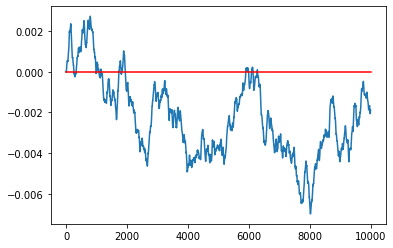

In [314]:
plt.plot(position[:,0])
plt.plot([0,Nmax],[0,0],color='red')

In [315]:
## MSD, mean square displacement
## c_{AA}(∆t) = 1/N * \sum_{j=1}^N A(t_j)*A(t_j + ∆t)

pMSD = np.zeros(Nmax)

for i in range(1,Nmax): ## loop for 
    pMSD[i] = (position[i,0]**2 + pMSD[i-1])/i

In [316]:
pMSD[0:10]

array([0.00000000e+00, 9.51885534e-12, 4.20370542e-11, 2.89404549e-11,
       1.18592850e-11, 1.52675043e-11, 3.35278137e-11, 1.24695941e-11,
       5.21322328e-12, 9.56969152e-11])

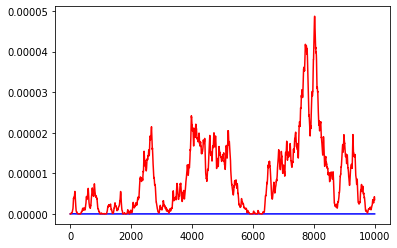

In [318]:
plt.plot(pMSD,color='blue')
plt.plot(position[:,0]**2,color='red')

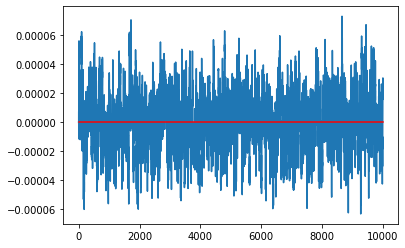

In [319]:
plt.plot(velocity[:,0])
plt.plot([0,Nmax],[0,0],color='red')

In [320]:
## MSD, mean square displacement

vMSD = np.zeros(Nmax)

for i in range(1,Nmax): ## loop for 
    vMSD[i] = (velocity[i,0]**2 +vMSD[i-1])/i

In [321]:
velocity[1:10,0]

array([-7.13177994e-07,  7.36246226e-06, -1.05109522e-05, -1.15989802e-05,
       -7.40218494e-06, -6.60085654e-06,  2.03462053e-05,  1.67839040e-05,
        2.85469269e-05])

In [322]:
velocity[1:10,0]**2

array([5.08622852e-13, 5.42058506e-11, 1.10480117e-10, 1.34536341e-10,
       5.47923419e-11, 4.35713071e-11, 4.13968069e-10, 2.81699435e-10,
       8.14927037e-10])

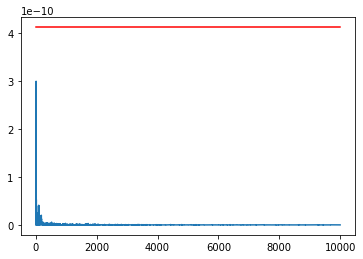

In [324]:
plt.plot(vMSD)
plt.plot([0,Nmax],[1/(beta*m),1/(beta*m)],color='red')

In [330]:
## Verify the Time Correlation Function
## c_{AA}(∆t) = 1/N * \sum_{j=1}^N A(t_j)*A(t_j + ∆t)

vTCF = np.zeros(Nmax)

for i in range(Nmax-1): ## loop for ∆t
    for j in range(Nmax-i): ## loop for t_i
        vTCF[i] = vTCF[i] + velocity[j,0] * velocity[j+i,0]

    vTCF[i] = vTCF[i] / (Nmax-i)



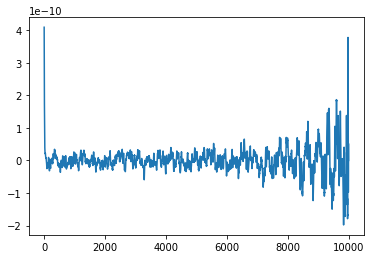

In [331]:
plt.plot(vTCF)
times=range(30)
#plt.plot(np.exp(-gamma*times[0:9])/(beta*m))
#plt.plot(1/(np.exp(times)*beta*m*np.exp(gamma)),color='red')

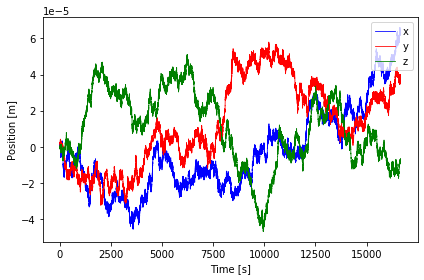

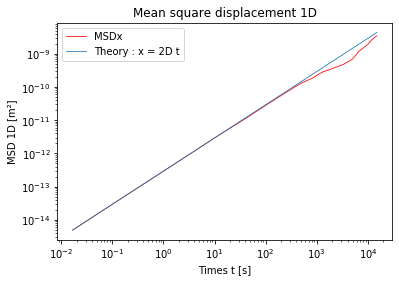

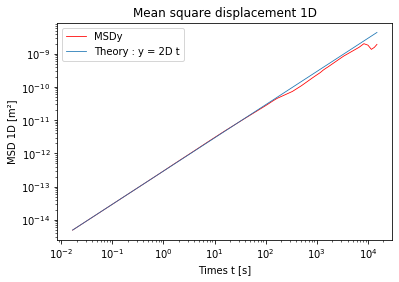

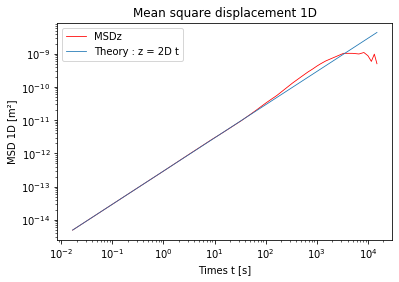

In [332]:
# Élodie Millan
# June 2020
# Langevin equation 3D bulk for a free particule without inertia.

import numpy as np
import matplotlib.pyplot as plt


class Langevin3D:
    """
    Brownian motion generation.
    """

    def __init__(self, dt, Nt, R, eta=0.001, T=300, x0=(0, 0, 0)):
        """
        Constructor.
        :param dt: Time step [s].
        :param Nt: Number of time points.
        :param R: Radius of particule [m].
        :param eta: Fluid viscosity (default = 0.001 [Pa/s]).
        :param T: Temperature (default = 300 [k]).
        :param x0: Initial position of particule (default = (0,0,0) [m]).
        """
        self.dt = dt
        self.Nt = Nt
        self.R = R
        self.eta = eta
        self.T = T
        self.x0 = x0

        self.kb = 1.38e-23
        self.gamma = 6 * np.pi * eta * R
        self.a = np.sqrt((2 * self.kb * T) / self.gamma)
        self.D = (self.kb * T) / (self.gamma)
        self.t = np.arange(Nt) * dt

    def trajectory(self, output=False, Nt=None):
        """
        Compute the trajectory of a Langevin3D particule.
        :param output: Boolean, if true function output x, y, z (default : false).
        :param Nt : Number of point of times (default is the number give in the instance of the class).
        :return: return the x, y, z trajectory.
        """
        if Nt == None:
            Nt = self.Nt

        rngx = np.random.default_rng().normal(0.0, np.sqrt(self.dt), size=Nt) * self.a
        rngx[0] = self.x0[0]
        self.x = np.cumsum(rngx)

        rngy = np.random.default_rng().normal(0.0, np.sqrt(self.dt), size=Nt) * self.a
        rngx[0] = self.x0[1]
        self.y = np.cumsum(rngy)

        rngz = np.random.default_rng().normal(0.0, np.sqrt(self.dt), size=Nt) * self.a
        rngx[0] = self.x0[2]
        self.z = np.cumsum(rngz)

        if output:
            return self.x, self.y, self.z

    def plotTrajectory(self):
        """
        Plot the trajectory of the Langevin3D object.
        """
        plt.plot(self.t, self.x, color="blue", linewidth=0.8, label="x")
        plt.plot(self.t, self.y, color="red", linewidth=0.8, label="y")
        plt.plot(self.t, self.z, color="green", linewidth=0.8, label="z")
        plt.xlabel("Time [s]")
        plt.ylabel("Position [m]")
        plt.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

    def MSD1D(self, axis, output=False, plot=False):
        """
        Compute the mean square displacement in 1 dimention.
        :param axis: The 1D trajectory to compute, "x" or "y" or "z".
        :param output: Boolean, if true function output MSD1D (default : false).
        :param plot: Boolean, if true plot MSD1D (default : false).
        :return: The mean square displacement in 1 dimension of the "axis" trajectory.
        """
        self.list_dt_MSD = np.array([], dtype=np.int)
        for i in range(len(str(self.Nt)) - 1):
            # Take just 10 points by decade.
            self.list_dt_MSD = np.concatenate(
                (
                    self.list_dt_MSD,
                    np.arange(10 ** i, 10 ** (i + 1), 10 ** i, dtype=np.int),
                )
            )

        if axis == "x":
            x = self.x
        elif axis == "y":
            x = self.y
        elif axis == "z":
            x = self.z
        else:
            raise ValueError("axis should be equal to 'x' or 'y' or 'z'")

        NumberOfMSDPoint = len(self.list_dt_MSD)
        self.MSD = np.zeros(NumberOfMSDPoint)
        for n, i in enumerate(self.list_dt_MSD):
            if i == 0:
                self.MSD[n] = 0
                continue
            self.MSD[n] = np.mean((x[i:] - x[0:-i]) ** 2)

        if plot:
            plt.loglog(
                self.t[self.list_dt_MSD],
                self.MSD,
                color="red",
                linewidth=0.8,
                label="MSD" + axis,
            )
            plt.plot(
                self.t[self.list_dt_MSD],
                (2 * self.kb * self.T / self.gamma) * self.t[self.list_dt_MSD],
                linewidth=0.8,
                label="Theory : " + axis + " = 2D t",
            )
            plt.xlabel("Times t [s]")
            plt.ylabel("MSD 1D [m²]")
            plt.title("Mean square displacement 1D")
            plt.legend()
            plt.show()

        if output:
            return self.MSD

    def MSD3D(self, output=False, plot=False):
        """
        Compute the mean square displacement at 3D.
        :param output: Boolean, if true function output MSD1D (default : false).
        :param plot: Boolean, if true plot MSD1D (default : false).
        :return: The mean square displacement in 3 dimension of the trajectory.
        """
        self.MSD3 = (
            self.MSD1D("x", output=True)
            + self.MSD1D("y", output=True)
            + self.MSD1D("z", output=True)
        )

        if plot:
            plt.loglog(
                self.t[self.list_dt_MSD],
                self.MSD3,
                "o",
                color="darkorchid",
                linewidth=1.,
                label="MSD3D ",
            )
            plt.plot(
                self.t[self.list_dt_MSD],
                (2 * 3 * self.kb * self.T / self.gamma) * self.t[self.list_dt_MSD],
                linewidth=0.6,
                color="black",
                label="Theory : x = 6D t",
            )
            plt.xlabel("Times t [s]")
            plt.ylabel("MSD 3D [m²]")
            plt.legend(fontsize='x-small', loc='upper left')
            plt.show()

        if output:
            return self.MSD3

    def speedDistribution1D(
        self, axis, nbTimesIntervalle=1, bins=50, output=False, plot=False
    ):
        """
        Compute the probability density function with Vx = [ x(t+ nbTimesIntervalle*dt) - x(t) ] / [ nbTimesIntervalle*dt ].
        :param axis: The 1D trajectory to compute, "x" or "y" or "z".
        :param nbTimesIntervalle: Number of times interval like x.dt (default = 1).
        :param bins : See numpy.histogram() documentation.
        :param output: Boolean, if true function output MSD1D (default : false).
        :param plot: Boolean, if true plot MSD1D (default : false).
        :return: Histogramme and bins positions.
        """
        if axis == "x":
            x = self.x
        elif axis == "y":
            x = self.y
        elif axis == "z":
            x = self.z
        else:
            raise ValueError("axis should be equal to 'x' or 'y' or 'z'")

        self.speed = (x[nbTimesIntervalle:] - x[:-nbTimesIntervalle]) / (
            nbTimesIntervalle * self.dt
        )
        hist, bin_edges = np.histogram(self.speed, bins=bins, density=True)
        binsPosition = (bin_edges[:-1] + bin_edges[1:]) / 2

        if plot:
            plt.plot(
                binsPosition,
                hist,
                "o",
                label="Times interval = " + np.str(nbTimesIntervalle) + " dt",
            )
            plt.title("Probability density function 1D")
            plt.xlabel("Speeds " + axis + " $[m.s^{-1}]$")
            plt.ylabel("Density normalised $[m^{-1}.s]$")
            plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
            plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
            plt.legend()
            plt.show()

        if output:
            return hist, binsPosition

    def dXDistribution1D(
        self, axis, nbTimesIntervalle=1, bins=50, output=False, plot=False
    ):
        """
        Compute the probability density function with dx = x(t+ nbTimesIntervalle*dt) - x(t)
        :param axis: The 1D trajectory to compute, "x" or "y" or "z".
        :param nbTimesIntervalle: Number of times interval like x.dt (default = 1).
        :param bins : See numpy.histogram() documentation.
        :param output: Boolean, if true function output MSD1D (default : false).
        :param plot: Boolean, if true plot MSD1D (default : false).
        :return: Histogramme and bins positions.
        """
        if axis == "x":
            x = self.x
        elif axis == "y":
            x = self.y
        elif axis == "z":
            x = self.z
        else:
            raise ValueError("axis should be equal to 'x' or 'y' or 'z'")

        self.dX = x[nbTimesIntervalle:] - x[:-nbTimesIntervalle]
        hist, bin_edges = np.histogram(self.dX, bins=bins, density=True)
        binsPosition = (bin_edges[:-1] + bin_edges[1:]) / 2

        if plot:
            plt.plot(
                binsPosition,
                hist,
                "o",
                label="Times interval = " + np.str(nbTimesIntervalle) + " dt",
            )
            plt.title("Probability density function 1D")
            plt.xlabel("$\Delta $" + axis + " $[m]$")
            plt.ylabel("Density normalised $[m^{-1}]$")
            plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
            plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
            plt.legend()
            plt.show()

        if output:
            return hist, binsPosition


def test():
    langevin3D = Langevin3D(
        dt=1/60, Nt=1000000, R=1.5e-6, x0=(0.0, 0.0, 0.0)
    )
    langevin3D.trajectory()

    langevin3D.plotTrajectory()
    langevin3D.MSD1D("x", plot=True)
    langevin3D.MSD1D("y", plot=True)
    langevin3D.MSD1D("z", plot=True)
    # langevin3D.MSD3D(plot=True)
    # #langevin3D.speedDistribution1D("x", 10, plot=True)
    # langevin3D.dXDistribution1D("x", 10, plot=True)

if __name__ == '__main__':
    test()



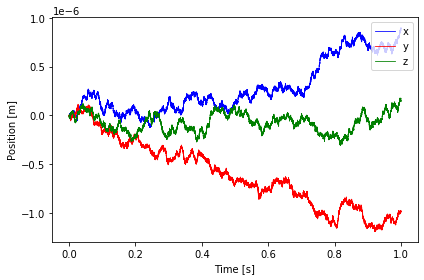

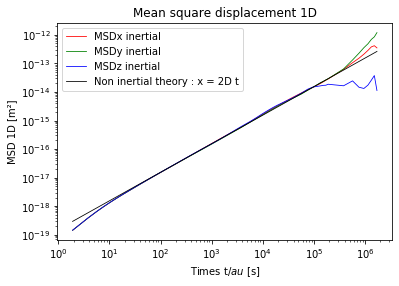

In [334]:
# Élodie Millan
# June 2020
# Langevin equation 3D bulk for a free particule with inertia.

import numpy as np
import matplotlib.pyplot as plt

#from OverdampedLangevin3D import Langevin3D


class InertialLangevin3D(Langevin3D):
    def __init__(self, dt, Nt, R, rho, eta=0.001, T=300, x0=(0, 0, 0)):
        """
        :param dt: Time step [s].
        :param Nt: Number of time points.
        :param R: Radius of particule [m].
        :param rho: Volumic mass of the particule [kg/m³]
        :param eta: Fluid viscosity (default = 0.001 [Pa/s]).
        :param T: Temperature (default = 300 [k]).
        :param x0: Initial position of particule (default = (0,0,0) [m]).
        """
        super().__init__(dt, Nt, R, eta=eta, T=T, x0=x0)
        self.rho = rho

        self.m = rho * (4 / 3) * np.pi * R ** 3
        self.tau = self.m / self.gamma
        self.a = np.sqrt(2 * self.kb * self.T * self.gamma)  # Coef of the white noise
        self.b = 2 + dt / self.tau
        self.c = 1 + dt / self.tau

    def _PositionXi(self, xi1, xi2, rng):
        """
        Intern methode of InertialLangevin3D class - Position of a Brownian particule at time t.
        :param xi1: Position of the particule at (t - dt).
        :param xi2: Position of the particule at (t - 2dt).
        :param rng: a random number for dBt white noise.
        :return: The position of the particule at time t.
        """
        xi = (
            (self.b / self.c * xi1)
            - (1 / self.c * xi2)
            + (self.a / self.c) * (self.dt**2 / self.m) * rng
        )

        return xi

    def trajectory(self, output=False, Nt=None):

        if Nt == None:
            Nt = self.Nt

        rngx = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=Nt
        )
        rngy = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=Nt
        )
        rngz = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=Nt
        )

        x = np.zeros(Nt)
        y = np.zeros(Nt)
        z = np.zeros(Nt)

        # 2 first values of trajectory compute with random trajectory.
        x[0:2], y[0:2], z[0:2] = super().trajectory(output=True, Nt=2)

        for i in range(2, Nt):

            x[i] = self._PositionXi(x[i - 1], x[i - 2], rngx[i])
            y[i] = self._PositionXi(y[i - 1], y[i - 2], rngy[i])
            z[i] = self._PositionXi(z[i - 1], z[i - 2], rngz[i])

        self.x = x
        self.y = y
        self.z = z

        if output:
            return self.x, self.y, self.z


def test():
    langevin3D = InertialLangevin3D(
        dt=1e-6, Nt=1000000, rho=1050.0, R=1.5e-6, x0=(0.0, 0.0, 0.0)
    )

    langevin3D.trajectory()
    langevin3D.plotTrajectory()
    MSDx = langevin3D.MSD1D("x", output=True)
    MSDy = langevin3D.MSD1D("y", output=True)
    MSDz = langevin3D.MSD1D("z", output=True)

    # ----- MSD 1D -----

    fig1 = plt.figure()
    plt.loglog(
        langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
        MSDx,
        color="red",
        linewidth=0.8,
        label="MSDx inertial",
    )
    plt.loglog(
        langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
        MSDy,
        color="green",
        linewidth=0.8,
        label="MSDy inertial",
    )
    plt.loglog(
        langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
        MSDz,
        color="blue",
        linewidth=0.8,
        label="MSDz inertial",
    )
    plt.plot(
        langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
        (2 * langevin3D.kb * langevin3D.T / langevin3D.gamma)
        * langevin3D.t[langevin3D.list_dt_MSD],
        color="black",
        linewidth=0.8,
        label="Non inertial theory : x = 2D t",
    )
    plt.xlabel("Times t/$ \tau $ [s]")
    plt.ylabel("MSD 1D [m²]")
    plt.title("Mean square displacement 1D")
    plt.legend()
    plt.show()


    # # ----- MSD 3D -----
    #
    # MSD3D = langevin3D.MSD3D(output=True)
    # fig2 = plt.figure()
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
    #     MSD3D,
    #     color="red",
    #     linewidth=0.8,
    #     label="Inertial MSD",
    # )
    # plt.plot(
    #     langevin3D.t[langevin3D.list_dt_MSD] / langevin3D.tau,
    #     (6 * langevin3D.kb * langevin3D.T / langevin3D.gamma)
    #     * langevin3D.t[langevin3D.list_dt_MSD],
    #     color="black",
    #     linewidth=0.8,
    #     label="Non inertial theory : x = 6D t",
    # )
    # plt.xlabel("Times $ t/ \tau $")
    # plt.ylabel("MSD 3D [m²]")
    # plt.title("Mean square displacement 1D")
    # plt.legend()
    # plt.show()
    #
    # # langevin3D.speedDistribution1D("x", 10, plot=True)
    # langevin3D.dXDistribution1D("x", 10, plot=True)

if __name__ == '__main__':
    test()




In [336]:
# Élodie Millan
# June 2020
# Langevin equation 3D for a free particule close to a rigid wall without inertia and with weight.

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

# from OverdampedLangevin3D import Langevin3D
# from InertialLangevin3D import InertialLangevin3D


class RigidWallOverdampedLangevin3D(InertialLangevin3D):  # , Langevin3D
    def __init__(self, dt, Nt, R, rho, rhoF=1000.0, eta=0.001, T=300.0, x0=None):
        """
        :param dt: float - Time step [s].
        :param Nt: int - Number of time points.
        :param R: float - Radius of particule [m].
        :param rho: float - Volumic mass of the particule [kg/m³].
        :param rhoF: float - Volumic mass of the fluid [kg/m³] (DEFAULT = 1000 [kg/m³]).
        :param eta: float - Fluid viscosity (DEFAULT = 0.001 [Pa/s]).
        :param T: float - Temperature (DEFAULT = 300 [k]).
        :param x0: array float - Initial position of particule (DEFAULT = (0,0,R) [m]).
        """
        if x0 == None:
            x0 = (0.0, 0.0, R)
        super().__init__(dt, Nt, R, rho, eta=eta, T=T, x0=x0)
        self.rhoF = rhoF
        self.lD = 70e-9  # Debay length
        self.g = 9.81  # m/s²
        self.m = rho * (4 / 3) * np.pi * R ** 3
        self.delta_m = (4 / 3) * np.pi * self.R ** 3 * (self.rho - self.rhoF)
        self.lB = (self.kb * self.T) / (self.delta_m * self.g)  # Boltzmann length

    def _gamma_xy(self, zi_1):
        """
        Intern methode of RigidWallInertialLangevin3D class - gamma on x and y at time t-dt.
        :param zi_1: float - Perpendicular position by the wall z at (t - dt).
        :return: gamma_x = gamma_y = 6πη(z)R : the gamma value for x and y trajectories dependant of z(t-dt).
        """
        # Libchaber formula
        xi = self.R / (zi_1 + self.R)

        self.gamma_xy = (
                6
                * np.pi
                * self.R
                * self.eta
                * (
                        1
                        - 9 / 16 * xi
                        + 1 / 8 * xi ** 3
                        - 45 / 256 * xi ** 4
                        - 1 / 16 * xi ** 5
                )
                ** (-1)
        )
        return self.gamma_xy

    def _gamma_z(self, zi_1):
        """
        Intern methode of RigidWallInertialLangevin3D class - gamma on z at time t-dt.
        :param zi_1: float - Perpendicular position by the wall z at (t - dt).
        :return: float - gamma_z = 6πη(z)R : the gamma value for z trajectory dependant of z(t-dt).
        """
        # Padé formula
        self.gamma_z = (
            6
            * np.pi
            * self.R
            * self.eta
            * (
                (
                    (6 * zi_1 ** 2 + 2 * self.R * zi_1)
                    / (6 * zi_1 ** 2 + 9 * self.R * zi_1 + 2 * self.R ** 2)
                )
                ** (-1)
            )
        )

        # print("gamma_z = ", self.gamma_z)
        return self.gamma_z

    def _a(self, gamma):
        """
        Intern methode of RigidWallInertialLangevin3D class - white noise a = sqrt(k T gamma) at t-dt.
        :param gamma: the gamma value used (depends of the coordinate used).
        :return: The white noise a at the position z(t-dt) for a gamma value on x/y or z.
        """

        a = np.sqrt(2 * self.kb * self.T / gamma)

        return a

    def _PositionXi(self, xi_1, zi_1, rng, axis=None):
        """
        Intern methode of InertialLangevin3D class - Position of a Brownian particule inertial with rigid wall, at time t.
        :param xi_1: float - Position of the particule at (t - dt).
        :param zi_1: float - Perpendicular position by the wall z at (t - dt).
        :param rng: a random number for dBt/dt white noise.
        :param axis: The axis used : put "z" if z axis or None if x/y axis.
        :return: The position of the particule at time t.
        """

        if axis == "z":
            gamma = self._gamma_z(zi_1)
            weight = self.delta_m * self.g * self.dt / (gamma)
            elec = (
                (4 * self.kb * self.T)
                / (self.lD)
                * np.exp(-zi_1 / self.lD)
                * self.dt
                / gamma
            )
            correction = (
               self.kb
               * self.T
               * (42 * self.R * zi_1 ** 2 + 24 * self.R ** 2 * zi_1 + 4 * self.R ** 3)
               / ( (6 * zi_1 ** 2 + 9 * self.R * zi_1 + 2 * self.R ** 2) * (6*zi_1**2 + 2*self.R*zi_1) )
               * self.dt
               / gamma
            )

        else:
            gamma = self._gamma_xy(zi_1)
            elec = 0
            weight = 0
            correction = 0

        xi = xi_1 - weight + elec + correction + self._a(gamma) * rng * self.dt

        if axis == "z":
            if xi <= 0:
                xi = -xi

        return xi

    def trajectory(self, output=False):
        """
        :param output: Boolean, if true function output x, y, z (default : false).
        :return: return the x, y, z trajectory.
        """
        rngx = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )
        rngy = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )
        rngz = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )

        self.rngx = rngx
        self.rngy = rngy
        self.rngz = rngz

        x = np.zeros(self.Nt)
        y = np.zeros(self.Nt)
        z = np.zeros(self.Nt)

        # First values of trajectory compute with initial value.
        x[0] = self.x0[0]
        y[0] = self.x0[1]
        z[0] = self.x0[2]

        for i in tqdm(range(1, self.Nt)):
            x[i] = self._PositionXi(x[i - 1], z[i - 1], rngx[i])
            y[i] = self._PositionXi(y[i - 1], z[i - 1], rngy[i])
            z[i] = self._PositionXi(z[i - 1], z[i - 1], rngz[i], "z")

        self.x = x
        self.y = y
        self.z = z

        if output:
            return self.x, self.y, self.z

    ## SOME ANALYSIS FUNCTIONS

    def Cumulant4(self, axis, plot=True, output=False):
        """
        :param axis: choose between "x", "y" or "z".
        :param plot: Plot show if True.
        :param output: Return {tau, cumulant4} if True.
        """
        # --- def some array
        if axis == "x":
            position = self.x
        elif axis == "y":
            position = self.y
        elif axis == "z":
            position = self.z
        else:
            raise ValueError('WRONG AXIS : choose between "x", "y" and "z" !')

        list_dt_c4 = np.array([], dtype=int)
        for i in range(len(str(self.Nt)) - 3):
            # Take just 10 points by decade.
            list_dt_c4 = np.concatenate(
                (
                    list_dt_c4,
                    np.arange(10 ** i, 10 ** (i + 1), 10 ** i, dtype=int),
                )
            )
        c4 = np.zeros(len(list_dt_c4))

        # --- Compute cumulant4
        for k, i in enumerate(tqdm(list_dt_c4)):
            if i == 0:
                c4[k] = 0
                continue
            c4[k] = (np.mean((position[i:] - position[:-i]) ** 4) - 3 * (
                np.mean((position[i:] - position[:-i]) ** 2)) ** 2) * 1 / (24)

        # --- Theory
        zth = np.linspace(1e-9, 10e-6, 300)
        if (axis == "z"):
            Di = self.kb * self.T / self._gamma_z(zth)
        else:
            Di = self.kb * self.T / self._gamma_xy(zth)

        P_eq_z = self.P_z_wall(zth, 4.8)
        P_eq_z = P_eq_z / np.trapz(P_eq_z, zth) #normalisation

        mean_Di_theo = np.trapz(Di * P_eq_z, zth)
        mean_Di2_theo = np.trapz(Di ** 2 * P_eq_z, zth)

        facteur_cumulant = (mean_Di2_theo - mean_Di_theo ** 2) / 2
        tth = np.linspace(np.min(self.t[list_dt_c4])/10,np.max(self.t[list_dt_c4])*10, 1000)

        if plot:
            plt.loglog(self.t[list_dt_c4], c4, "o", label=r"$\mathrm{Numerical}$")
            plt.plot(tth, facteur_cumulant * tth**2, "k-", label=r"$(\langle D_{\|, \mathrm{th}}^2 \rangle - \langle D_{\|, \mathrm{th}} \rangle^2)/2$")

            plt.xlabel(r"$\tau~(\mathrm{s})$", fontsize=15)
            plt.ylabel(r"$C^{(4)_"+axis+"}~(\mathrm{m}^4)$", fontsize=15)
            plt.axis([np.min(self.t[list_dt_c4]) / 5, np.max(self.t[list_dt_c4]) * 5, None, None])

            ax = plt.gca()
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0,), numticks=100)
            ax.xaxis.set_major_locator(locmaj)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100)
            ax.xaxis.set_minor_locator(locmin)
            ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0,), numticks=100)
            ax.yaxis.set_major_locator(locmaj)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100)
            ax.yaxis.set_minor_locator(locmin)
            ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

            plt.legend()
            plt.show()

        if output:
            return self.t[list_dt_c4], c4



    def PDF(self, axis, N_tau=10, space=None, bins=50, plot=True, output=False):
        """
        :param axis: choose between "x", "y", "z", "dx", "dy" or "dz".
        :param N_tau: For displacements "dx", "dy" or "dz", choose lag time tau = N_tau * dt. (Default = 10).
        :param space: Choose if "bulk" or "wall".
        :param bins: Number of bins in histogramme. (Default = 50).
        :param plot: Plot show if True.
        :param output: Return {BinsPositions, Histogramme} is True.
        """
        B = 4.8
        tau_c = self.lB*self.R / self.D #equation (5.2.11) thèse Maxime :)
        tau = N_tau * self.dt

        # ------ What do you want ? ----
        if axis == "x":
            Axis = axis
            position = self.x

        elif axis == "y":
            Axis = axis
            position = self.y

        elif axis == "z":
            Axis = axis
            position = self.z

        elif axis == "dx":
            Axis = "\Delta x"
            position = self.x
            dX = position[N_tau:] - position[:-N_tau]
            std_num = np.std(dX)

        elif axis == "dy":
            Axis = "\Delta y"
            position = self.y
            dX = position[N_tau:] - position[:-N_tau]
            std_num = np.std(dX)

        elif axis == "dz":
            Axis = "\Delta z"
            position = self.z
            dX = position[N_tau:] - position[:-N_tau]
            std_num = np.std(dX)

        else:
            raise ValueError('WRONG AXIS : choose between positions "x", "y" and "z" or displacements "dx", "dy" and '
                             '"dz" !')

        # --------- Verification space
        if space != "bulk" and space != "wall":
            raise ValueError('WRONG SPACE : choose between "bulk" and "wall" !')


        # --------- PDF on the good space
        if space == "bulk":
            hist, bin_edges = np.histogram(dX, bins=bins, density=True)
            binsPositions = (bin_edges[:-1] + bin_edges[1:]) / 2
            binsPositions = binsPositions / np.sqrt(2 * D * dt * N_tau)
            pdf = hist / np.trapz(hist, binsPositions)

            z_theo = np.linspace(-5, 5, bins)
            PDFtheo = 1 / np.sqrt(2 * np.pi) * np.exp(-z_theo ** 2 / 2)

        if space == "wall":
            if axis == "x" or axis == "y" or axis == "z":
                hist, bin_edges = np.histogram(position[position < 3e-6], bins=bins, density=False)
                binsPositions = (bin_edges[:-1] + bin_edges[1:]) / 2
                pdf = hist / np.trapz(hist, binsPositions)

                if axis == "z":
                    z_theo = np.linspace(1e-9, np.max(binsPositions*2), 10*bins)
                    p_theo = np.exp(- 4.8 * np.exp(-z_theo / self.lD) - z_theo / self.lB)
                    PDFtheo = p_theo / np.trapz(p_theo, z_theo)
            else:
                # Calcul de la théorie gaussienne qui marche plus
                dx_gauss = np.linspace(np.min(dX*10), np.max(dX*10), 1000)
                # std_gauss = np.sqrt(2*self.D* N_tau*self.dt)
                PDF_gauss = 1 / (np.sqrt(2 * np.pi)*std_num) * np.exp(-(dx_gauss/std_num) ** 2 / 2)  # Gaussian theory wrong
                PDF_gauss = PDF_gauss/np.trapz(PDF_gauss, dx_gauss)

                # Calcul de la PDF(dx) numerique
                hist, bin_edges = np.histogram(dX, bins=bins, density=False)
                binsPositions = (bin_edges[:-1] + bin_edges[1:]) / 2
                pdf = hist / np.trapz(hist, binsPositions)
                binsPositions = binsPositions/std_num
                Label = r"$\tau = " + str(np.around(N_tau * self.dt, 4)) + "\mathrm{s}$"

                #Calcul de la théorie qui marche
                if (axis=="dz" and tau>=tau_c):
                    PDFtheo = self.P_deltaZ_longTime(dx_gauss, B)
                else:
                    PDFtheo = self.P_deltaXi_shortTime(dx_gauss, N_tau, axis, 1000, B)

                dx_theo = dx_gauss/std_num


        if plot:
            if space == "bulk":
                plt.semilogy(binsPositions, pdf, "o", markersize=4, label=r"$\mathrm{Numerical}$")
                plt.plot(z_theo, PDFtheo, "k-", label=r"$\mathrm{Theoritical}$")

                plt.xlabel(r"$" + Axis + "/ \sqrt{2D \Delta t} $")
                plt.ylabel(r"$P(" + Axis + ") $")

            if space == "wall":
                plt.semilogy(binsPositions, pdf, "o", label=r"$\mathrm{Numerical}$")

                if axis == "x" or axis == "y" or axis == "z":
                    if axis == "z":
                        plt.plot(z_theo, PDFtheo, "k-", label=r"$\mathrm{Theoritical}$")
                    plt.xlabel(r"$" + Axis + "(\mathrm{m})$", fontsize=15)
                    plt.ylabel(r"$P(" + Axis + ") ~ (\mathrm{m}^{-1})$", fontsize=15)
                else:
                    if (tau<tau_c):
                        plt.plot(dx_gauss/std_num, PDF_gauss, "r:", label=r"$\mathrm{Gaussian}$")
                    plt.plot(dx_theo, PDFtheo, "k-", label=r"$\mathrm{Theory}$")

                    plt.title(Label)
                    plt.xlabel(r"$" + Axis + "/ \sigma_\mathrm{num}$", fontsize=15)
                    plt.ylabel(r"$P(" + Axis + ")$", fontsize=15)

            ax = plt.gca()
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0,), numticks=100)
            ax.yaxis.set_major_locator(locmaj)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100)
            ax.yaxis.set_minor_locator(locmin)
            ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

            plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
            plt.legend()
            plt.show()


    def P_z_wall(self, z, B):
        """
        :param A: Normalisation.
        :param B: 4.8 experimentally.
        :return: P_eq(z) near a wall.
        """
        if type(z) != np.ndarray:
            if z < 0:
                return 0
            return np.exp(-(B) * np.exp(- z / self.lD) - z / self.lB)

        P = np.exp(-(B) * np.exp(- z / self.lD) - z / self.lB)
        P[z < 0] = 0

        return P

    def Pz_PDeltaz(self, z, deltaz, A, B):
        # P(z)*P(z+Deltaz)
        PP = self.P_z_wall(z, A, B) * self.P_z_wall(z + deltaz, A, B)

        return PP

    def p_Deltaz_longTime(self, z, deltaz, A, B):
        # integrate of P(z)*P(z+Deltaz) on z
        PPP = np.trapz(self.Pz_PDeltaz(z, deltaz, A, B), z)

        return PPP

    def P_Deltaz_longTime(self, z, deltaz, B, lD, lB):
        A = 1
        PPPP = np.zeros(len(deltaz))
        for i in range(len(deltaz)):
            PPPP[i] = self._P_Deltaz_longTime(z, deltaz[i], A, B)
        A = 1 / np.trapz(PPPP, deltaz)

        return PPPP * A

    # Pour la théorie prêt d'un mur dur
    def P_Di(self, axis, bins, B):

        z = np.linspace(1e-10, 10e-6, bins)

        if (axis == "dz" or axis=="z"):
            Di = self.kb * self.T / self._gamma_z(z)

        else:
            Di = self.kb * self.T / self._gamma_xy(z)

        p_Di = Di * self.P_z_wall(z, B)
        p_Di = p_Di / np.trapz(p_Di, z)

        return Di, p_Di

    def _P_deltaXi_shortTime(self, dxi, N_tau, axis, bins, B):
        tau = N_tau*self.dt # tau from dx = x(t+tau)-x(t)
        Di, p_Di = self.P_Di(axis=axis, bins=bins, B=B)
        P = p_Di / np.sqrt(4 * np.pi * Di * tau) * np.exp(- dxi**2 / (4 * Di * tau))
        P = np.trapz(P,Di)

        return P

    def P_deltaXi_shortTime(self, list_dxi, N_tau, axis, bins, B):
        """
        :param list_dxi: List of dx=x(t+tau)-x(t).
        :param N_tau: Like tau = N_tau*dt, where dt is integration step.
        :param axis: Choose between "x", "y" or "z" axis.
        :param B:
        :return:
        """
        P = np.array([self._P_deltaXi_shortTime(dxi=i, N_tau=N_tau, axis=axis, bins=bins, B=B) for i in list_dxi])
        P = P/np.trapz(P, list_dxi)

        return P

    def _P_deltaZ_longTime(self, dz, B):

        z = np.linspace(1e-9, 10e-6, 500)
        dP = self.P_z_wall(z, B) * self.P_z_wall(z+dz, B)
        P = np.trapz(dP, z)

        return P

    def P_deltaZ_longTime(self, dz, B):
        Pdf = np.array([self._P_deltaZ_longTime(i,B) for i in dz])
        Pdf = Pdf/np.trapz(Pdf, dz)

        return Pdf



"""
FIN CLASSE
"""


def test():
    langevin3D = RigidWallOverdampedLangevin3D(
        dt=1 / 60, Nt=1000000, R=1.5e-6, rho=1050, x0=(0.0, 0.0, 1.0e-6)
    )
    langevin3D.trajectory()

    # langevin3D.plotTrajectory()
    #
    # MSDx = langevin3D.MSD1D("x", output=True)
    # MSDy = langevin3D.MSD1D("y", output=True)
    # MSDz = langevin3D.MSD1D("z", output=True)
    #
    # # ----- MSD 1D -----
    #
    # fig1 = plt.figure()
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDx,
    #     color="red",
    #     linewidth=0.8,
    #     label="MSDx inertial",
    # )
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDy,
    #     color="green",
    #     linewidth=0.8,
    #     label="MSDy inertial",
    # )
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDz,
    #     color="blue",
    #     linewidth=0.8,
    #     label="MSDz inertial",
    # )
    # plt.plot(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     (2 * langevin3D.kb * langevin3D.T / langevin3D.gamma)
    #     * langevin3D.t[langevin3D.list_dt_MSD],
    #     color="black",
    #     linewidth=0.8,
    #     label="Non inertial theory : x = 2D t",
    # )
    # plt.xlabel("Times t/$ \tau $ [s]")
    # plt.ylabel("MSD 1D [m²]")
    # plt.title("Mean square displacement 1D")
    # plt.legend()
    # plt.show()
    #
    # plt.plot(langevin3D.t, langevin3D.z * 1e6)
    # plt.show()

if __name__ == '__main__':
    test()

100%|██████████| 999999/999999 [00:27<00:00, 36550.22it/s]


In [337]:
# Élodie Millan
# July 2020
# Langevin equation 3D for a free particule close to a rigid wall with inertia and weight.

import numpy as np
import matplotlib.pyplot as plt

#from RigidWallOverdampedLangevin3D import RigidWallOverdampedLangevin3D


class RigidWallInertialLangevin3D(RigidWallOverdampedLangevin3D):  # hérite de RigidWallOverdampedLangevin3D
    def __init__(self, dt, Nt, R, rho, rhoF=1000.0, eta=0.001, T=300.0, x0=None):
        """
        :param dt: float - Time step [s].
        :param Nt: int - Number of time points.
        :param R: float - Radius of particule [m].
        :param rho: float - Volumic mass of the particule [kg/m³].
        :param rhoF: float - Volumic mass of the fluid [kg/m³] (DEFAULT = 1000 [kg/m³]).
        :param eta: float - Fluid viscosity (DEFAULT = 0.001 [Pa/s]).
        :param T: float - Temperature (DEFAULT = 300 [k]).
        :param x0: array float - Initial position of particule (DEFAULT = (0,0,R) [m]).
        """
        if x0 == None:
            x0 = (0.0, 0.0, R)
        super().__init__(dt, Nt, R, rho, eta=eta, T=T, x0=x0)

        self.gamma_mean = 6 * np.pi * eta * R # average of gamma
        self.tau_mean = self.m / self.gamma_mean # average of tau

    def _a(self, gamma):
        """
        Intern methode of RigidWallInertialLangevin3D class - white noise a = sqrt(k T gamma) at t-dt.
        :param gamma: the gamma value used at t-dt times (depends of the coordinate used).
        :return: The white noise a at the position z(t-dt) for a gamma value on x/y or z.
        """

        a = np.sqrt(2 * self.kb * self.T * gamma)

        return a

    def _PositionXi(self, xi_1, xi_2, zi_1, rng, axis=None):
        """
        Intern methode of InertialLangevin3D class - Position of a Brownian particule inertial with rigid wall, at time t.
        :param xi_1: float - Position of the particule at (t - dt).
        :param xi_2: float - Position of the particule at (t - 2dt).
        :param zi_1: float - Perpendicular position by the wall z at (t - dt).
        :param rng: a random number for dBt/dt white noise.
        :param axis: The axis used : put "z" if z axis or None if x/y axis.
        :return: The position of the particule at time t.
        """
        m = self.m
        dt = self.dt
        g = self.g
        delta_m = self.delta_m
        T = self.T
        kb = self.kb
        lD = self.lD

        if axis == "z":
            gamma = self._gamma_z(zi_1)
            weight = -(delta_m / m) * g * dt ** 2
            elec = (4 * kb * T) / (lD * m) * np.exp(-zi_1 / lD) * dt ** 2

        else:
            gamma = self._gamma_xy(zi_1)
            weight = 0
            elec = 0

        # --- Cas dérivée centrée xi+1 - xi-1 /2dt - marche mais différente que le cas précedent
        # b = 1 / (1 + dt * gamma / m)  # coef on factor
        # xi = b * ((dt*gamma/(m) - 1)*xi_2 + 2*xi_1 + 2*weight + 2*elec + 2*self._a(gamma) * dt**2 * rng / m)

        # --- cas dérivée précedent
        b = 2 + dt * gamma / m
        c = 1 + dt * gamma / m
        xi = 1/c * ( b * xi_1 - xi_2 + weight + elec + self._a(gamma) * (dt ** 2 / m) * rng)

        if axis == "z":
            if xi < 0:
                xi = -xi  # reflection

        return xi

    def trajectory(self, output=False):
        """
        :param output: Boolean, if true function output x, y, z (default : false).
        :return: return the x, y, z trajectory.
        """
        rngx = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )
        rngy = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )
        rngz = (1 / np.sqrt(self.dt)) * np.random.default_rng().normal(
            0.0, 1, size=self.Nt
        )

        x = np.zeros(self.Nt)
        y = np.zeros(self.Nt)
        z = np.zeros(self.Nt)

        # 2 first values of trajectory
        x[0:2] = np.array([self.x0[0], self.x0[0]])
        y[0:2] = np.array([self.x0[1], self.x0[1]])
        z[0:2] = np.array([self.x0[2], self.x0[2]])

        for i in range(2, self.Nt):
            x[i] = self._PositionXi(x[i - 1], x[i - 2], z[i - 1], rngx[i])
            y[i] = self._PositionXi(y[i - 1], y[i - 2], z[i - 1], rngy[i])
            z[i] = self._PositionXi(z[i - 1], z[i - 2], z[i - 1], rngz[i], "z")

        self.x = x
        self.y = y
        self.z = z

        if output:
            return self.x, self.y, self.z

def test():
    langevin3D = RigidWallInertialLangevin3D(
        dt=1e-6, Nt=1000000, R=1.5e-6, rho=1050, x0=(0.0, 0.0, 1.0e-6)
    )
    langevin3D.trajectory()

    # langevin3D.plotTrajectory()
    # MSDx = langevin3D.MSD1D("x", output=True)
    # MSDy = langevin3D.MSD1D("y", output=True)
    # MSDz = langevin3D.MSD1D("z", output=True)
    #
    # # ----- MSD 1D -----
    #
    # fig1 = plt.figure()
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDx,
    #     color="red",
    #     linewidth=0.8,
    #     label="MSDx inertial",
    # )
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDy,
    #     color="green",
    #     linewidth=0.8,
    #     label="MSDy inertial",
    # )
    # plt.loglog(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     MSDz,
    #     color="blue",
    #     linewidth=0.8,
    #     label="MSDz inertial",
    # )
    # plt.plot(
    #     langevin3D.t[langevin3D.list_dt_MSD],
    #     (2 * langevin3D.kb * langevin3D.T / langevin3D.gamma_mean)
    #     * langevin3D.t[langevin3D.list_dt_MSD],
    #     color="black",
    #     linewidth=0.8,
    #     label="Non inertial theory : x = 2D t",
    # )
    # plt.xlabel("Times t [s]")
    # plt.ylabel("MSD 1D [m²]")
    # plt.title("Mean square displacement 1D")
    # plt.legend()
    # plt.show()


if __name__ == '__main__':
    test()

In [338]:
import numpy as np
from numba import jit

@jit
def Trajectory(Nt, R, delta_m, eta, dt, lD, x0):

    rngx = (1 / np.sqrt(dt)) * np.random.default_rng().normal(0.0, 1, size=Nt)
    rngy = (1 / np.sqrt(dt)) * np.random.default_rng().normal(0.0, 1, size=Nt)
    rngz = (1 / np.sqrt(dt)) * np.random.default_rng().normal(0.0, 1, size=Nt)


    x = np.zeros(Nt)
    y = np.zeros(Nt)
    z = np.zeros(Nt)

    x[0] = x0[0]
    y[0] = x0[1]
    z[0] = x0[2]

    for i in range(1, Nt):
        x[i] = positionxi(x[i - 1], z[i - 1], R, rngx[i], delta_m, dt, eta, lD)
        y[i] = positionxi(y[i - 1], z[i - 1], R, rngy[i], delta_m, dt, eta, lD)
        z[i] = positionxi(z[i - 1], z[i - 1], R, rngz[i], delta_m, dt, eta, lD, "z")

    return x, y, z

@jit
def positionxi(xi_1, zi_1, R, rng, delta_m, dt, lD, eta, axis=None):
    g = 9.81
    kb = 1.380e-23
    T = 300

    if axis == "z":
        gamma = _gamma_z(zi_1, R, eta)
        weight = delta_m * g * dt / (gamma)
        elec = 4*kb*T/lD * np.exp(-zi_1 / lD) * dt / gamma
        correction = (
            kb
            * T
            * (42 * R * zi_1 ** 2 + 24 * R ** 2 * zi_1 + 4 * R ** 3)
            / (
                (6 * zi_1 ** 2 + 9 * R * zi_1 + 2 * R ** 2)
                * (6 * zi_1 ** 2 + 2 * R * zi_1)
            )
            * dt
            / gamma
        )

    else:
        gamma = _gamma_xy(zi_1, R, eta)
        elec = 0
        weight = 0
        correction = 0

    xi = xi_1 - weight + elec + correction + _a(gamma) * rng * dt

    if axis == "z":
        if xi <= 0:
            xi = -xi

    return xi
@jit
def _gamma_z(zi_1, R, eta):
    """
    Intern methode of RigidWallInertialLangevin3D class - gamma on z at time t-dt.
    :param zi_1: float - Perpendicular position by the wall z at (t - dt).
    :return: float - gamma_z = 6πη(z)R : the gamma value for z trajectory dependant of z(t-dt).
    """
    # Padé formula
    gamma_z = (
        6
        * np.pi
        * R
        * eta
        * (
            (
                (6 * zi_1 ** 2 + 2 * R * zi_1)
                / (6 * zi_1 ** 2 + 9 * R * zi_1 + 2 * R ** 2)
            )
            ** (-1)
        )
    )

    return gamma_z
@jit
def _gamma_xy(zi_1, R, eta):
    """
    Intern methode of RigidWallInertialLangevin3D class - gamma on x and y at time t-dt.
    :param zi_1: float - Perpendicular position by the wall z at (t - dt).
    :return: gamma_x = gamma_y = 6πη(z)R : the gamma value for x and y trajectories dependant of z(t-dt).
    """
    # Libchaber formula
    gamma_xy = (
        6
        * np.pi
        * R
        * eta
        * (
            1
            - ((9 * R) / (16 * (zi_1 + R)))
            + (R / (8 * (zi_1 + R))) ** 3
            - (45 * R / (256 * (zi_1 + R))) ** 4
            - (R / (16 * (zi_1 + R))) ** 5
        )
        ** (-1)
    )
    return gamma_xy
@jit
def _a(gamma):
    """
    Intern methode of RigidWallInertialLangevin3D class - white noise a = sqrt(k T gamma) at t-dt.
    :param zi_1: float - Perpendicular position by the wall z at (t - dt).
    :param gamma: the gamma value used (depends of the coordinate used).
    :return: The white noise a at the position z(t-dt) for a gamma value on x/y or z.
    """
    kb = 1.380e-23
    T = 300
    a = np.sqrt(2 * kb * T / gamma)
    return a


if __name__ == "__main__":
    import time
    Nt = 10000000
    delta_m = 7.068583470577035e-16
    R = 1.5e-6
    eta = 0.001
    dt = 1 / 60
    lD = 70e-9
    x0 = (0, 0, 1.5e-6)
    t = time.time()
    x, y, z = Trajectory(Nt, R, delta_m, eta, dt, lD, x0)
    print(time.time() - t)


    Nt = 10000000
    t = time.time()
    x, y, z = Trajectory(Nt, R, delta_m, eta, dt, lD, x0)
    print(time.time() - t)

<ipython-input-338-54fe9367319f>:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Trajectory" failed type inference due to: Unknown attribute 'default_rng' of type Module(<module 'numpy.random' from '/Users/aratame/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>)

File "<ipython-input-338-54fe9367319f>", line 7:
def Trajectory(Nt, R, delta_m, eta, dt, lD, x0):
    <source elided>

    rngx = (1 / np.sqrt(dt)) * np.random.default_rng().normal(0.0, 1, size=Nt)
    ^

[1] During: typing of get attribute at <ipython-input-338-54fe9367319f> (7)

File "<ipython-input-338-54fe9367319f>", line 7:
def Trajectory(Nt, R, delta_m, eta, dt, lD, x0):
    <source elided>

    rngx = (1 / np.sqrt(dt)) * np.random.default_rng().normal(0.0, 1, size=Nt)
    ^

  @jit
<ipython-input-338-54fe9367319f>:4: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "Trajectory" failed type infer

3.949676036834717
1.363814115524292
